In [1]:
import tensorflow as tf

In [2]:
# 1. MNIST 데이터넷 임포트
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
# 2. 데이터 전처리
x_train, x_test = x_train/255.0, x_test/255.0

In [6]:
# 3. 모델 구성
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(512, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

In [7]:
# 4. 모델 컴파일
model.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

In [8]:
# 5. 모델 훈련
history = model.fit(x_train, y_train, epochs=2, verbose=1)

Epoch 1/2
1875/1875 [==============================] - 9s 4ms/step - loss: 0.1999 - accuracy: 0.9408
Epoch 2/2
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0823 - accuracy: 0.9743


In [22]:
# 5. 모델 훈련
# verbose: Integer. 0, 1, or 2. 
# Verbosity mode. 
# 0 = silent, 
# 1 = progress bar, 
# 2 = one line per epoch.

In [23]:
history = model.fit(x_train, y_train,
                    validation_data=(x_test,y_test), 
                    steps_per_epoch=50,
                    validation_steps=50,
                    epochs=50, verbose=1)

Epoch 1/50
50/50 [==============================] - 1s 11ms/step - loss: 0.0025 - accuracy: 0.9997 - val_loss: 0.0652 - val_accuracy: 0.9841
Epoch 2/50
50/50 [==============================] - 0s 10ms/step - loss: 0.0021 - accuracy: 0.9998 - val_loss: 0.0647 - val_accuracy: 0.9841
Epoch 3/50
50/50 [==============================] - 1s 10ms/step - loss: 0.0019 - accuracy: 0.9998 - val_loss: 0.0645 - val_accuracy: 0.9845
Epoch 4/50
50/50 [==============================] - 1s 12ms/step - loss: 0.0017 - accuracy: 0.9999 - val_loss: 0.0644 - val_accuracy: 0.9849
Epoch 5/50
50/50 [==============================] - 1s 11ms/step - loss: 0.0016 - accuracy: 0.9999 - val_loss: 0.0643 - val_accuracy: 0.9846
Epoch 6/50
50/50 [==============================] - 0s 10ms/step - loss: 0.0014 - accuracy: 0.9999 - val_loss: 0.0643 - val_accuracy: 0.9848
Epoch 7/50
50/50 [==============================] - 0s 10ms/step - loss: 0.0013 - accuracy: 0.9999 - val_loss: 0.0642 - val_accuracy: 0.9850
Epoch 8/50
50

In [24]:
# 6. 모델 저장
model.save('model1.h5')

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [26]:
import matplotlib.pyplot as plt

In [27]:
acc = history.history['accuracy']
loss =  history.history['loss']
val_acc =  history.history['val_accuracy']
val_loss = history.history['val_loss']

In [31]:
# acc

In [29]:
epochs = range(len(acc))

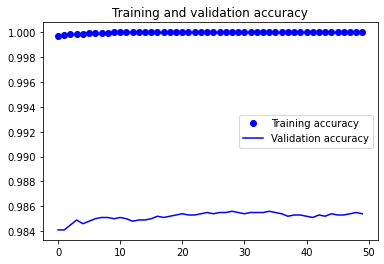

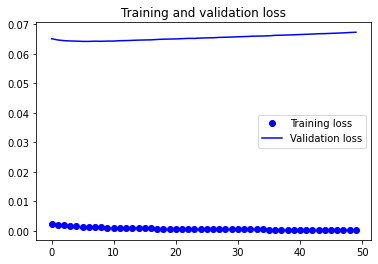

In [30]:
plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')

plt.legend()

plt.show()

In [ ]:
통계학 regression 회귀 

In [3]:
import tensorflow as tf
from tensorflow import keras

print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
# Num GPUs Available: 1 이상의 숫자가 나오면 성공. 나는 외장 GPU가 하나라서 1로 출력된다.
# 만약 계속 0으로 뜬다면, 이 방법을 따라하기 전에 본인 컴퓨터에 외장 GPU가 깔려있나 확인해보자

tf.test.is_built_with_cuda()
# True라고 나오면 성공

print(tf.version.VERSION)
# tensorflow 버전명이 정상 출력되면 성공. 내 경우는 2.1.0이다

import sys
sys.version

Num GPUs Available:  0
2.8.0


'3.9.7 (default, Sep 16 2021, 16:59:28) [MSC v.1916 64 bit (AMD64)]'

In [5]:
tf.config.experimental.list_physical_devices('GPU')


[]

In [7]:
tf.test.gpu_device_name()

''

In [3]:
import pandas as pd 
df = pd.read_csv("C:/Users/user/Downloads/mnist_train.csv/mnist_train.csv")
df.head()

In [19]:
import numpy as np 
import tensorflow as tf # 텐서 플로우 기본 임포트
from tensorflow.keras.models import Sequential # 모델 박스
from tensorflow.keras.layers import Flatten, Dense # 모델박스 정의 인풋레이어 아웃풋 레이어 정의하기 
from tensorflow.keras.optimizers import SGD       #옵티마이저 알고리즘 담당
from sklearn.model_selection import train_test_split # 트레인 테스트 분리
from sklearn.preprocessing import MinMaxScaler # 큰 숫자를 작은 숫자로 변경 -1~ +1까지 
from tensorflow.keras.layers import Conv2D, MaxPooling2D # cnn

In [36]:
y_data = df['label']
x_data = df.drop('label', axis = 1)

In [38]:
# 픽셀 데이터 정규화 하는데, 정규화 (0~1 사이의 실수로 변환 )
scaler = MinMaxScaler() # 객체 생성 
scaler.fit(x_data) # r객체학습
norm_x_data = scaler.transform(x_data) #scaler 사용해서 실제 갑을 변환 

In [41]:
x_train,x_test,y_train,y_test = train_test_split(norm_x_data,y_data,test_size = 0.3)

In [92]:
model = Sequential()
model.add(Conv2D(
    filters=32,
    kernel_size = (3,3),
    strides= (1,1),
    activation = 'relu',
    input_shape=(28, 28, 1))) 

In [93]:
model.add(Conv2D(
    filters=64,
    kernel_size = (3,3),
    strides= (1,1),
    activation = 'relu'
    )) 

In [86]:
model.add(MaxPooling2D(pool_size = (2,2)))

In [ ]:
model.add(Dense(units))

In [89]:
# 아웃풋
model.add(Dense(units=10, activation = 'softmax')

SyntaxError: unexpected EOF while parsing (Temp/ipykernel_9344/1435991563.py, line 2)

In [70]:
model.add(Dense(units))

In [71]:
model.add(Flatten())

In [63]:
# wjscp 4차원에서 2차원으로 

In [46]:
#  DNN flatten 으로 풀엇어 ,그러나 cnn은 3차원으로 들어와 28,28 g하나가 들어간다는것

In [47]:
# fc layer (dnn) 의 imput layer 필요해 

In [78]:
# 은닉층


SyntaxError: unexpected EOF while parsing (Temp/ipykernel_9344/123097312.py, line 2)

In [82]:
# 모델 어떻게 동작하는지 지정 컴파일
compile
model.compile(optimizer = SGD(learning_rate = 0.0001), loss = 'sparse_categorical_crossentropy',metrics = ['accuracy'])

In [83]:
# 설정을 모두 마쳤으면 예측 하고 비교 ! 
model.fit(x_train, y_train, epochs = 50 , verbose=1 , validation_split = 0.2 )

Epoch 1/50


ValueError: in user code:

    File "C:\ProgramData\Anaconda3\lib\site-packages\keras\engine\training.py", line 1021, in train_function  *
        return step_function(self, iterator)
    File "C:\ProgramData\Anaconda3\lib\site-packages\keras\engine\training.py", line 1010, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\ProgramData\Anaconda3\lib\site-packages\keras\engine\training.py", line 1000, in run_step  **
        outputs = model.train_step(data)
    File "C:\ProgramData\Anaconda3\lib\site-packages\keras\engine\training.py", line 859, in train_step
        y_pred = self(x, training=True)
    File "C:\ProgramData\Anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\ProgramData\Anaconda3\lib\site-packages\keras\engine\input_spec.py", line 264, in assert_input_compatibility
        raise ValueError(f'Input {input_index} of layer "{layer_name}" is '

    ValueError: Input 0 of layer "sequential_5" is incompatible with the layer: expected shape=(None, 28, 28, 1), found shape=(32, 784)


In [ ]:
cnn 쉽게 이해하기 

In [ ]:
이미지를 위해서 합성곱을 했다. 문제는  dnn의 문제부터 출발 
중요한 이미지 디덱트 , 긴부리 , 새라는 것은 짧은 것을 가지는 경우도 있다. / 위에 있는 새 부리 중간에 있는 색부리 28행 28열

In [ ]:
숫자가 들어가 있어 0~ 255까지 있음 , / 5 x 5 = 

In [ ]:
필터와 커널은 동일하다 . 필터라는 것을 101 010 101 / 

In [ ]:
행렬을 곱해 , 둘이 곱해 , 1,*1 +0+1 /움직여서 한다 , ..

In [ ]:
5행 5열 3행 3열의 결과로 필터 스트라이빙 적용한 합성곱 , / 

In [ ]:
r dp eogksrjt , g b 리절트 합해서 하나로 차원을 만든다. 

In [ ]:
갈수록 사이즈가 줄어든다 .10개정도 필터가 필요함 입력값이 10개라 10개 필요함 . 

In [ ]:
풀링, 맥스풀링 , 그리고 평균풀링 ,
특징들만 골라서 , 학습 !  

1자는 / 불러와서 ,, 한다 , 사이징 한 결과 줄어 들어 , 또다시 풀링하고 ,4차원이 발생
2차원으로 펼쳐서 가야 해서 리에십해야한다 .